# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

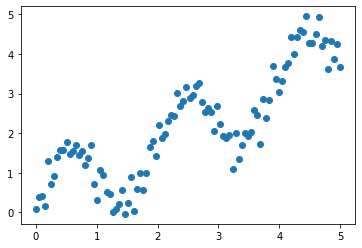

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5441514679511773


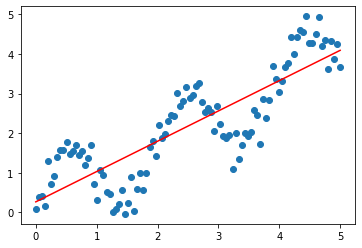

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

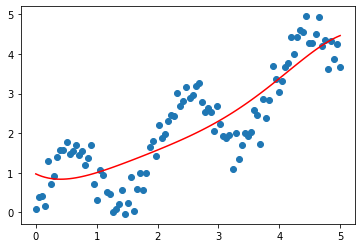

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.7344085   1.19110095 -0.53328116  0.11690246 -0.00928554]
interception:  0.9714902500845581


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.97149025, 0.93736918, 0.90892289, 0.8857661 , 0.86753105,
       0.85386715, 0.84444057, 0.83893394, 0.83704593, 0.83849089,
       0.84299852, 0.85031346, 0.86019495, 0.87241646, 0.88676532,
       0.90304236, 0.92106151, 0.94064951, 0.96164545, 0.98390048,
       1.0072774 , 1.03165031, 1.05690425, 1.08293482, 1.10964781,
       1.13695885, 1.16479305, 1.1930846 , 1.22177644, 1.25081987,
       1.28017419, 1.30980634, 1.33969055, 1.36980791, 1.40014609,
       1.43069891, 1.461466  , 1.49245243, 1.52366834, 1.55512858,
       1.58685234, 1.61886279, 1.6511867 , 1.68385409, 1.71689784,
       1.75035337, 1.78425821, 1.81865169, 1.85357455, 1.88906858,
       1.92517622, 1.96194025, 1.9994034 , 2.03760797, 2.07659546,
       2.11640626, 2.1570792 , 2.19865125, 2.24115712, 2.28462892,
       2.32909575, 2.37458338, 2.42111387, 2.46870519, 2.51737086,
       2.5671196 , 2.61795494, 2.66987487, 2.72287146, 2.77693051,
       2.83203119, 2.88814562, 2.94523859, 3.00326712, 3.06218

In [15]:
regr_poly.predict(X_poly)

array([0.97149025, 0.93736918, 0.90892289, 0.8857661 , 0.86753105,
       0.85386715, 0.84444057, 0.83893394, 0.83704593, 0.83849089,
       0.84299852, 0.85031346, 0.86019495, 0.87241646, 0.88676532,
       0.90304236, 0.92106151, 0.94064951, 0.96164545, 0.98390048,
       1.0072774 , 1.03165031, 1.05690425, 1.08293482, 1.10964781,
       1.13695885, 1.16479305, 1.1930846 , 1.22177644, 1.25081987,
       1.28017419, 1.30980634, 1.33969055, 1.36980791, 1.40014609,
       1.43069891, 1.461466  , 1.49245243, 1.52366834, 1.55512858,
       1.58685234, 1.61886279, 1.6511867 , 1.68385409, 1.71689784,
       1.75035337, 1.78425821, 1.81865169, 1.85357455, 1.88906858,
       1.92517622, 1.96194025, 1.9994034 , 2.03760797, 2.07659546,
       2.11640626, 2.1570792 , 2.19865125, 2.24115712, 2.28462892,
       2.32909575, 2.37458338, 2.42111387, 2.46870519, 2.51737086,
       2.5671196 , 2.61795494, 2.66987487, 2.72287146, 2.77693051,
       2.83203119, 2.88814562, 2.94523859, 3.00326712, 3.06218

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [28]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [29]:
sigma = 0.3

In [30]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [31]:
regr_rbf = LinearRegression()

In [32]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

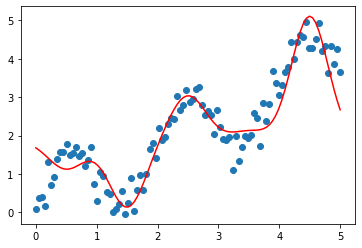

In [33]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [34]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.73250234 -1.72877103  1.17941002  0.25244693  3.24284942]
interception:  1.8636786198696595


#### Comparison

In [35]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

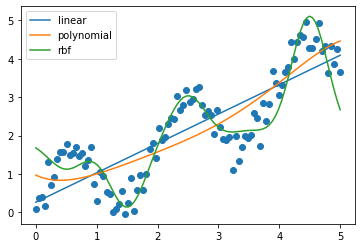

In [36]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5441514679511773


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.48204451152384664


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.258885389153523
